# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We {**Team_ZF1**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Libraries for data preparation and model building
import statsmodels.graphics.api as sga
import statsmodels.formula.api as sfa
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
import re


# print multiple outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# function to display all rows and columns in the dataframe

def display_all(df):
    
    '''Displays all rows and columns in a dataframe.
            
            Parameter
            ---------
            df: dataframe
                A 2-dimentional labeled data structure with columns and rows
       
            Returns
            -------
            df: dataframe
                A 2-dementional labeled data structure with specified increased limit
                of columns and rows
    
    '''
    
    with pd.option_context("display.max_rows", 1000):  # enables a better view of records
        with pd.option_context("display.max_columns", 1000):  # enables a better view of features
            display(df)  # to view function output

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
# loading datasets
df = pd.read_csv('df_train.csv', parse_dates=['time'])
dftest= pd.read_csv('df_test.csv', parse_dates=['time'])

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### A look at data statistics

In [4]:
# Checking for missing values

df.isna().sum() 

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [5]:
# Checking for column object type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            8763 non-null   int64         
 1   time                  8763 non-null   datetime64[ns]
 2   Madrid_wind_speed     8763 non-null   float64       
 3   Valencia_wind_deg     8763 non-null   object        
 4   Bilbao_rain_1h        8763 non-null   float64       
 5   Valencia_wind_speed   8763 non-null   float64       
 6   Seville_humidity      8763 non-null   float64       
 7   Madrid_humidity       8763 non-null   float64       
 8   Bilbao_clouds_all     8763 non-null   float64       
 9   Bilbao_wind_speed     8763 non-null   float64       
 10  Seville_clouds_all    8763 non-null   float64       
 11  Bilbao_wind_deg       8763 non-null   float64       
 12  Barcelona_wind_speed  8763 non-null   float64       
 13  Barcelona_wind_deg

In [6]:
# check data statistics

display_all(df.describe())

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1015.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,1018.000000,304.150000,1022.00

### plot relevant feature interactions

In [7]:
# Function to create scatterplot of all columns against the dependent variable 

def scatter_plot(predictor, response, plotrow=1, plotcolumn=1, figsize=(4,3)):
    ''' 
    Takes in two dataframes, row count, column count and total size of subplots;
    and returns scatterplot of all columns against specified dependent variable

            Parameters
            ----------
            predictor: dataframe
                A 2-dimentional labeled data structure with columns and rows containing all variables
                
            response: dataframe
                A 2-dimentional labeled data structure with one column and rows containing dependent variable
                
            plotrow: int
                count of plots shown per row
                
            plotcolumn: int
                count of plots shown per column
                
            figsize: 2 numeric values (a,b)
                size of entire output in the; 'a' being the columns length and 'b' the rows length

            Returns
            -------
            Subplots of scatterplot
    '''
    fig, axs = plt.subplots(plotcolumn,plotrow, figsize=figsize)
    fig.subplots_adjust(hspace = 0.5, wspace=.2)
    axs = axs.ravel()

    for index, column in enumerate(predictor.columns):
        axs[index].title.set_text("{} vs. Y".format(column))
        predictor_plots = axs[index].scatter(x=predictor[column],y=response, color="blue", edgecolor="white")

    fig.tight_layout(pad=1)

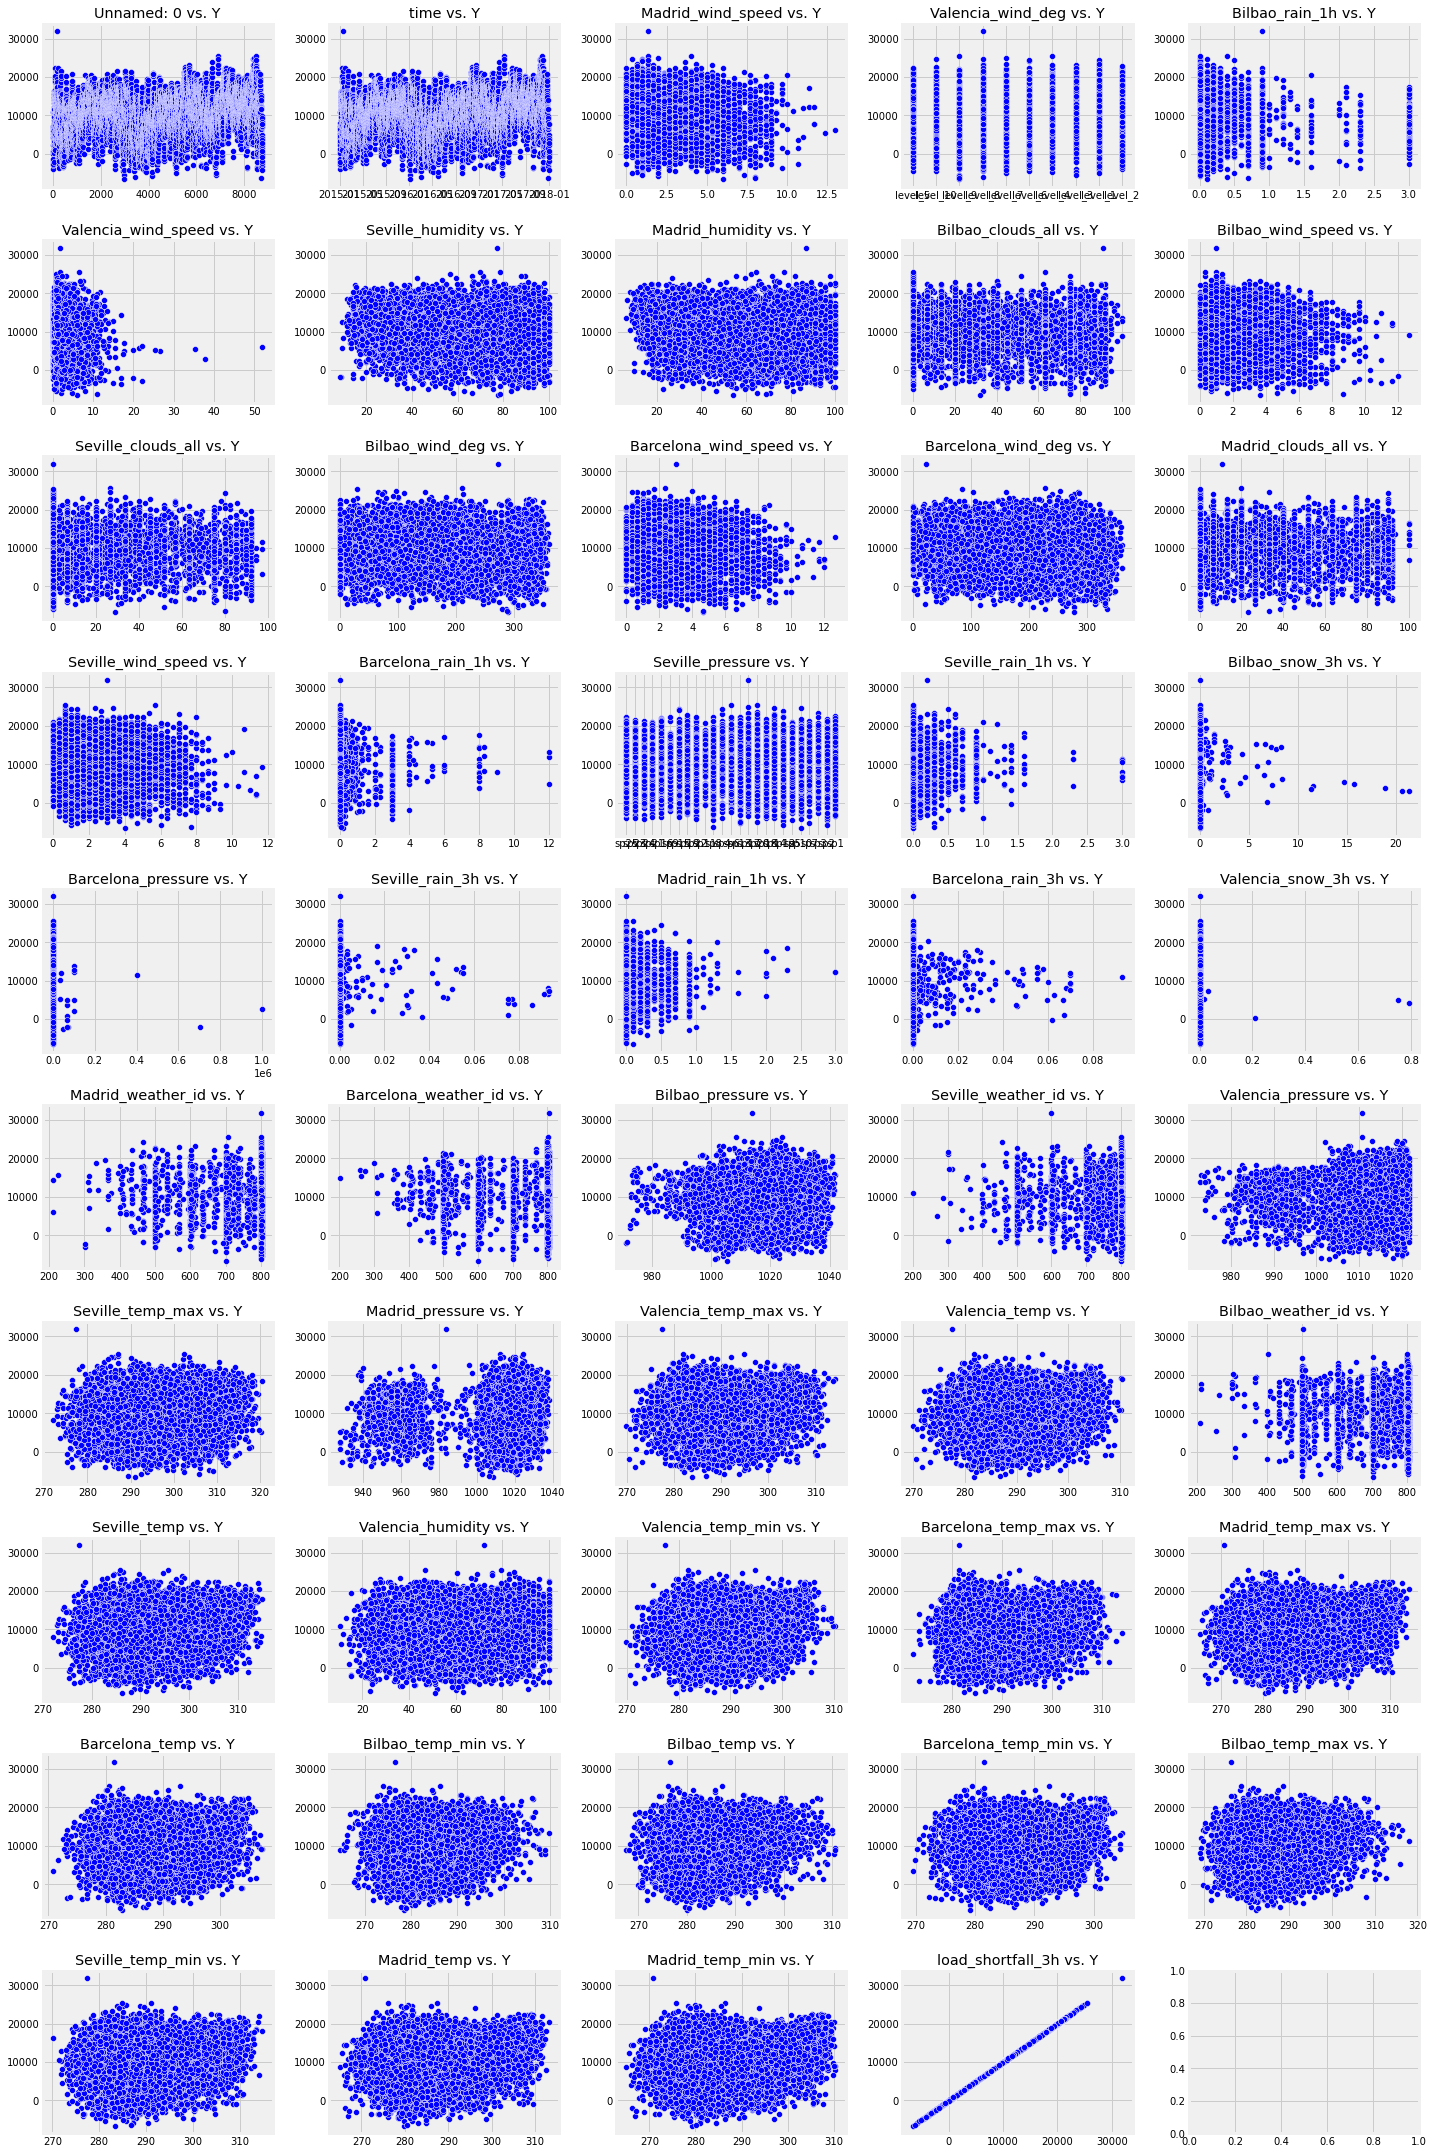

In [8]:
scatter_plot(df, df[["load_shortfall_3h"]], plotrow=5, plotcolumn=10, figsize=(20,30))

### Have a look at feature distributions

In [9]:
# load dataframe from preious step with original time column

plot = df.copy()
plot.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [10]:
# drop unnecessary columns based on their outrageous value range as compared to same features in other cities

outliers = ["Unnamed: 0", "Valencia_wind_deg", "Seville_pressure", "Barcelona_pressure"]
plot_clean = plot.drop(outliers, axis=1)

In [11]:
# Function to aggregate variables across cities using mean

def aggregate_var(df, search_words):
    ''' 
    Takes in a dataframe and keywords to aggregate with;
    and returns dataframe with aggregated columns using mean

            Parameters
            ----------
            df: dataframe
                A 2-dimentional labeled data structure with columns and rows

            search_words: list of strings
                keywords to search for when performing each iteration of aggregate

            Returns
            -------
            df: dataframe 
                A 2-dimentional labeled data structure with columns and rows
    '''
    for i in search_words:
        c = df.filter(regex=i, axis=1)
        df["Mean_"+ i] = c.mean(axis=1)
        df = df.drop(c.columns, axis=1)
    return df

In [12]:
data_aggregate = aggregate_var(plot_clean, search_words=["temp", "wind_deg", "humidity", "clouds_all", "weather_id",
                                  "pressure", "rain_1h", "rain_3h", "wind_speed", "snow_3h"])
data_aggregate.columns

Index(['time', 'load_shortfall_3h', 'Mean_temp', 'Mean_wind_deg',
       'Mean_humidity', 'Mean_clouds_all', 'Mean_weather_id', 'Mean_pressure',
       'Mean_rain_1h', 'Mean_rain_3h', 'Mean_wind_speed', 'Mean_snow_3h'],
      dtype='object')

In [13]:
# make row index identical to the time column

data_aggregate.index = data_aggregate['time']
data_aggregate.head(2)

,time,load_shortfall_3h,Mean_temp,Mean_wind_deg,Mean_humidity,Mean_clouds_all,Mean_weather_id,Mean_pressure,Mean_rain_1h,Mean_rain_3h,Mean_wind_speed,Mean_snow_3h
time,,,,,,,,,,,,
2015-01-01 03:00:00,2015-01-01 03:00:00,6715.666667,272.086456,133.0,71.333333,0.0,800.0,1003.000000,0.0,0.0,2.400000,0.0
2015-01-01 06:00:00,2015-01-01 06:00:00,4171.666667,272.799533,180.0,71.333333,0.0,800.0,1004.222222,0.0,0.0,2.066667,0.0


<AxesSubplot:title={'center':'load_shortfall_3h'}, xlabel='time'>

<AxesSubplot:title={'center':'Mean_temp'}, xlabel='time'>

<AxesSubplot:title={'center':'Mean_wind_deg'}, xlabel='time'>

<AxesSubplot:title={'center':'Mean_humidity'}, xlabel='time'>

<AxesSubplot:title={'center':'Mean_clouds_all'}, xlabel='time'>

<AxesSubplot:title={'center':'Mean_weather_id'}, xlabel='time'>

<AxesSubplot:title={'center':'Mean_pressure'}, xlabel='time'>

<AxesSubplot:title={'center':'Mean_rain_1h'}, xlabel='time'>

<AxesSubplot:title={'center':'Mean_rain_3h'}, xlabel='time'>

<AxesSubplot:title={'center':'Mean_wind_speed'}, xlabel='time'>

<AxesSubplot:title={'center':'Mean_snow_3h'}, xlabel='time'>

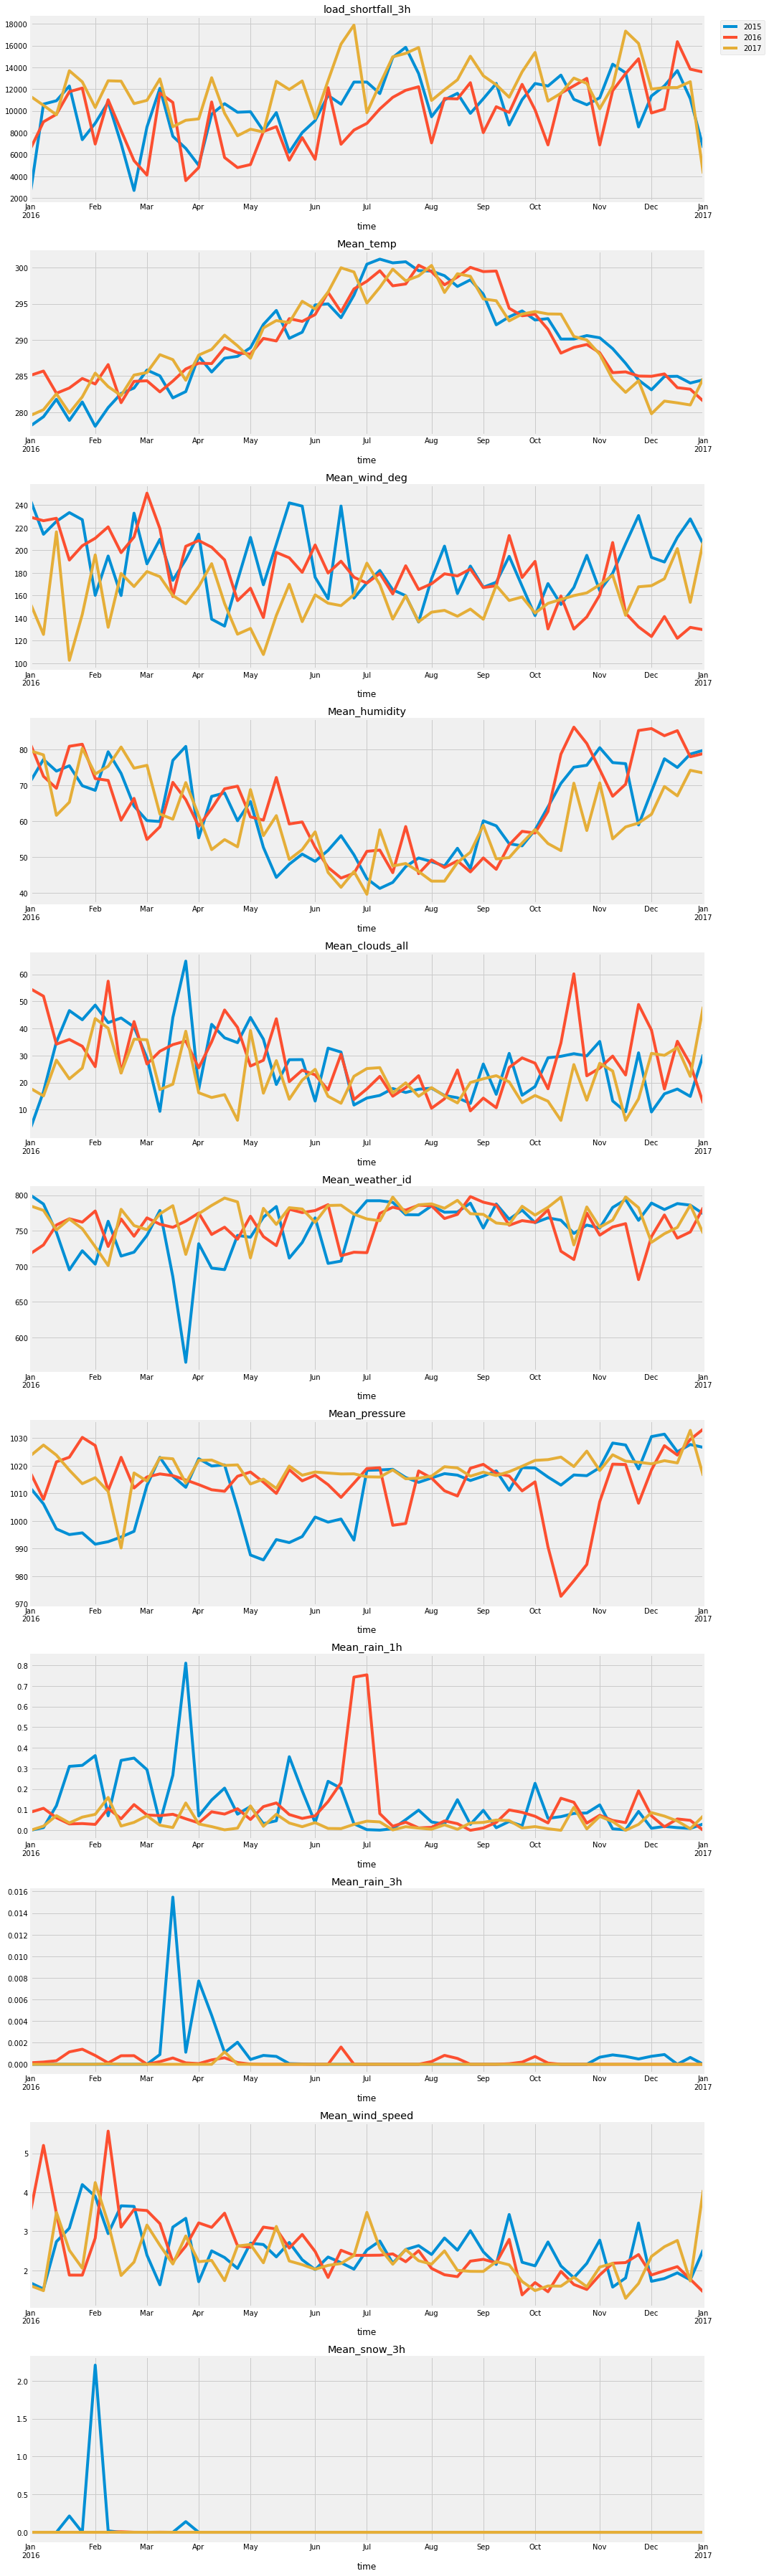

In [14]:
# plot time series of the mean of each measured weather feature across cities; resampled to weekly representation (using mean) of said feature

fig, axes = plt.subplots(11, 1, figsize=(15, 50))

idx = pd.MultiIndex.from_arrays([
        pd.to_datetime(data_aggregate.index.strftime('2016-%m-%d %H:%M:%S')),
        data_aggregate.index.year
    ])

d1 = data_aggregate.set_index(idx).unstack().resample('W').mean()
d1.load_shortfall_3h.plot(ax=axes[0], title='load_shortfall_3h')
lg = axes[0].legend(bbox_to_anchor=(1.02, 1), loc=2, ncol=1)

d1.Mean_temp.plot(ax=axes[1], title='Mean_temp', legend=False)
d1.Mean_wind_deg.plot(ax=axes[2], title='Mean_wind_deg', legend=False)
d1.Mean_humidity.plot(ax=axes[3], title='Mean_humidity', legend=False)
d1.Mean_clouds_all.plot(ax=axes[4], title='Mean_clouds_all', legend=False)
d1.Mean_weather_id.plot(ax=axes[5], title='Mean_weather_id', legend=False)
d1.Mean_pressure.plot(ax=axes[6], title='Mean_pressure', legend=False)
d1.Mean_rain_1h.plot(ax=axes[7], title='Mean_rain_1h', legend=False)
d1.Mean_rain_3h.plot(ax=axes[8], title='Mean_rain_3h', legend=False)
d1.Mean_wind_speed.plot(ax=axes[9], title='Mean_wind_speed', legend=False)
d1.Mean_snow_3h.plot(ax=axes[10], title='Mean_snow_3h', legend=False)


fig.tight_layout()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

### create new features

In [15]:
# function to return components of datatime for more granular analysis

def add_datepart (df, fldname):
    
    ''' 
    Takes in a datetime column and returns individual datetime components
    
            Parameters
            ----------
            df: dataframe
                A 2-dimentional labeled data structure with columns and rows
                      
            fldname: feature
                Specified series object of the dataframe
                
            Returns
            -------
            df: dataframe 
                A 2-dimentional labeled data structure with columns and rows
                and additional date and time features
    '''
    fld = df[fldname] # create a series object
    targ_pre = re.sub('[Dd]ates','', fldname)
    
    for n in ("Year", "Month", "Week", "Day", "Hour", "Dayofweek", "Dayofyear"): 
        
        df[targ_pre+n] = getattr(fld.dt, n.lower())
    df[targ_pre+'Elapsed' ] = (fld - fld.min()).dt.days 
    df.drop(fldname, axis=1, inplace=True)
    
    return df

In [16]:
# create new dataframes for future use

df1= add_datepart(df.copy(), 'time')
dftest1= add_datepart(dftest.copy(), 'time')

In [17]:
# function to replace null values with preferred values

def conditional_impute(input_df, choice='mean'):
    '''
    Takes in a dataframe with null values, and returns dataframe without null values.
    
            Parameters
            ----------
            input_df: dataframe
                A 2-dimentional labeled data structure with columns and rows
                
            choice: preffered value(s)
                Aggregate option used to replace null values
                
            Returns
            -------
            input_df: dataframe
                Grouped dataframe based on the timeYear and timeMonthfeatures without null 
                values
                    
            Else
            ----
            Error: unsatisfied conditions
                Returns a ValueError
    '''
    
    if choice == 'mean':
        input_df['Valencia_pressure']= input_df.groupby(['timeYear', 'timeMonth'])['Valencia_pressure'].apply(lambda x: x.fillna(round(x.mean(), 1)))
        
        return input_df
    
    elif choice== 'median':
        input_df['Valencia_pressure']= input_df.groupby(['timeYear', 'timeMonth'])['Valencia_pressure'].apply(lambda x: x.fillna(x.median()))
        
        return input_df
    
    else:
        raise ValueError

In [18]:
# remove missing values/ features
 
df1_mean= conditional_impute(df1, 'mean') # df.isna filled with mean of year and quarter readings 
df1_median= conditional_impute(df1, 'median') # df.isna filled with median of year and quarter readings 
dftest1_mean= conditional_impute(dftest1, 'mean') 

### engineer existing features

In [19]:
# look at unique values in object df

print(df1_mean.Valencia_wind_deg.unique())
print(df1_mean.Seville_pressure.unique())

['level_5' 'level_10' 'level_9' 'level_8' 'level_7' 'level_6' 'level_4'
 'level_3' 'level_1' 'level_2']
['sp25' 'sp23' 'sp24' 'sp21' 'sp16' 'sp9' 'sp15' 'sp19' 'sp22' 'sp11'
 'sp8' 'sp4' 'sp6' 'sp13' 'sp17' 'sp20' 'sp18' 'sp14' 'sp12' 'sp5' 'sp10'
 'sp7' 'sp3' 'sp2' 'sp1']


In [20]:
# converting dtype object features to dtype int for train set

df1_mean['Valencia_wind_deg']= df1_mean["Valencia_wind_deg"].str.extract("(\d+)").astype(int)
df1_mean["Seville_pressure"] = df1_mean["Seville_pressure"].str.extract("(\d+)").astype(int)

In [21]:
# converting dtype object features to dtype int for test set

dftest1_mean['Valencia_wind_deg']= dftest1_mean["Valencia_wind_deg"].str.extract("(\d+)").astype(int)
dftest1_mean["Seville_pressure"] = dftest1_mean["Seville_pressure"].str.extract("(\d+)").astype(int)

In [22]:
# eximination of engineered train data

df1_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   int32  
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

The above summary indicates the absence of any object dtype in the train dataset after engineering of some variables

In [23]:
# checking for null values

display_all(dftest1_mean.isna().sum())

Unnamed: 0              0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

As seen, we have been able to successfully replace all null values in our dataset

In [24]:
# examination of the engineered test data to ensure no object dtype

dftest1_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   Madrid_wind_speed     2920 non-null   float64
 2   Valencia_wind_deg     2920 non-null   int32  
 3   Bilbao_rain_1h        2920 non-null   float64
 4   Valencia_wind_speed   2920 non-null   float64
 5   Seville_humidity      2920 non-null   float64
 6   Madrid_humidity       2920 non-null   float64
 7   Bilbao_clouds_all     2920 non-null   float64
 8   Bilbao_wind_speed     2920 non-null   float64
 9   Seville_clouds_all    2920 non-null   float64
 10  Bilbao_wind_deg       2920 non-null   float64
 11  Barcelona_wind_speed  2920 non-null   float64
 12  Barcelona_wind_deg    2920 non-null   float64
 13  Madrid_clouds_all     2920 non-null   float64
 14  Seville_wind_speed    2920 non-null   float64
 15  Barcelona_rain_1h    

The above summary indicates the absence of any object dtype in the test dataset after engineering of some variables

In [25]:
# understanding the strengths between the features and the label

display_all(df1_mean.corr()['load_shortfall_3h'])

Unnamed: 0              0.192612
Madrid_wind_speed      -0.150981
Valencia_wind_deg      -0.188674
Bilbao_rain_1h         -0.152510
Valencia_wind_speed    -0.142791
Seville_humidity       -0.167290
Madrid_humidity        -0.150536
Bilbao_clouds_all      -0.127293
Bilbao_wind_speed      -0.081602
Seville_clouds_all     -0.091804
Bilbao_wind_deg        -0.120800
Barcelona_wind_speed   -0.103633
Barcelona_wind_deg     -0.116133
Madrid_clouds_all      -0.081623
Seville_wind_speed     -0.048433
Barcelona_rain_1h      -0.056633
Seville_pressure       -0.030434
Seville_rain_1h        -0.031572
Bilbao_snow_3h         -0.031721
Barcelona_pressure     -0.034385
Seville_rain_3h        -0.032945
Madrid_rain_1h         -0.027159
Barcelona_rain_3h      -0.024720
Valencia_snow_3h       -0.021633
Madrid_weather_id       0.030868
Barcelona_weather_id    0.063868
Bilbao_pressure         0.039052
Seville_weather_id      0.061104
Valencia_pressure       0.092574
Seville_temp_max        0.109834
Madrid_pre

From the above figures, we can observe a weak negative relationship among some predictor variables against the response variable as well as a weak positive correlation between other predictor variables against the response variable.

<AxesSubplot:>

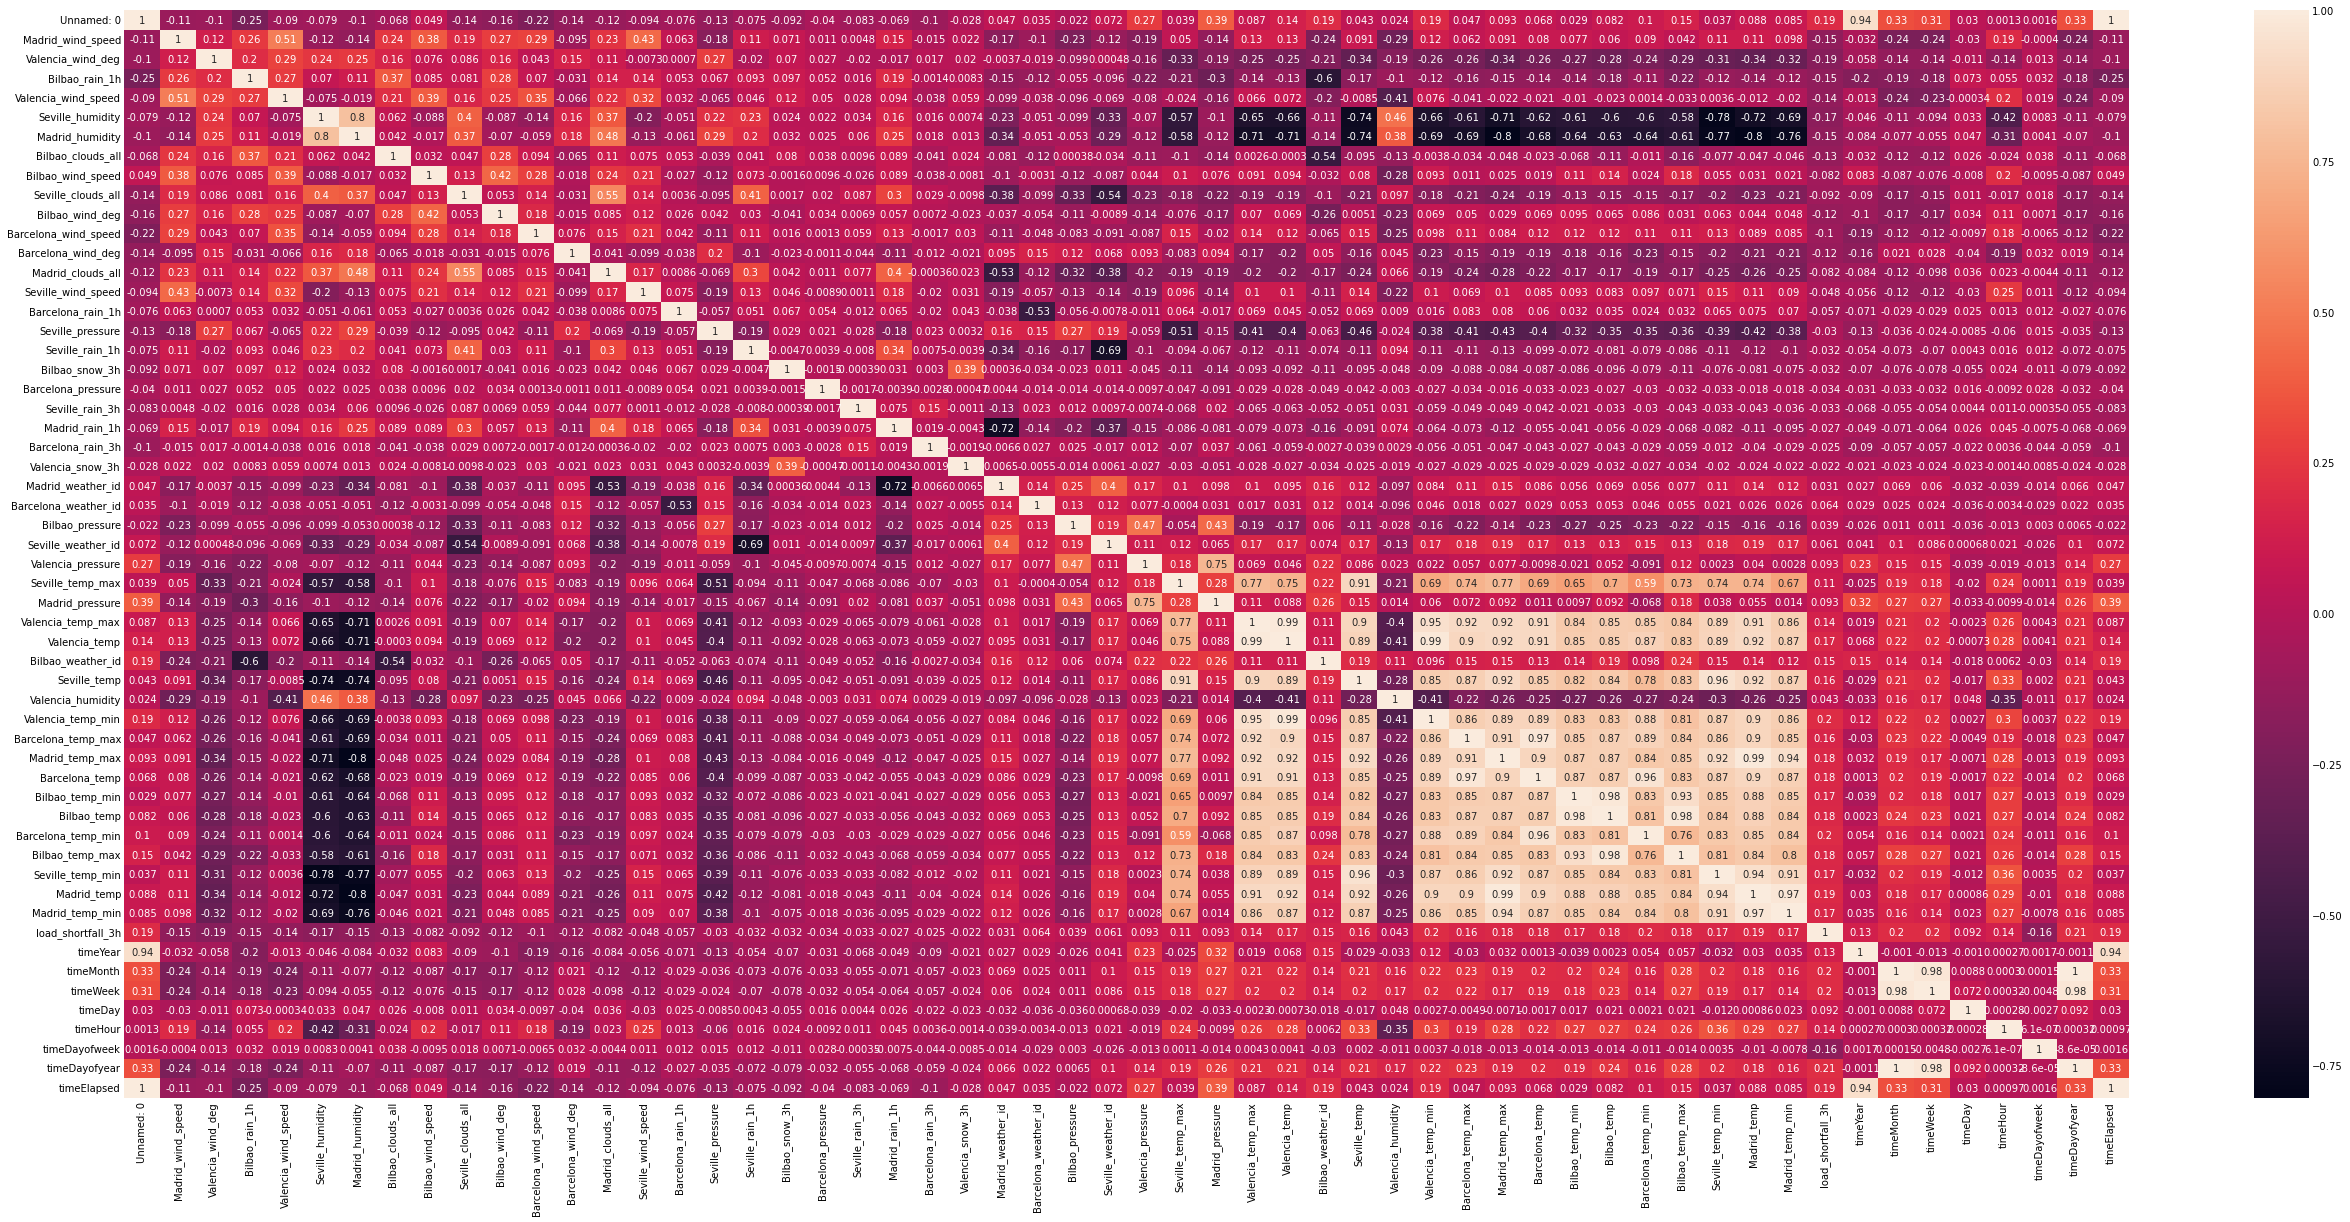

In [26]:
# Display of features relationship using heatmap

fig, axes= plt.subplots(figsize=(40,20))
sns.heatmap(df1_mean.corr(), annot=True)
plt.show()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

### Model Building
1. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
2. Build a Random Forest which would serve as our base model using the train data.
3. Build LinearRegression,Cross Validation, Lasso and Ridge models to compare perfomance to the base model

In [27]:
# spliting our dataset

X = df1_mean.copy().drop(['load_shortfall_3h', 'Unnamed: 0'], axis=1)

dftest1_mean_d = dftest1_mean.drop('Unnamed: 0', axis=1)

y = df1_mean[['load_shortfall_3h']]


In [28]:
# Separating our models into training set and testing set

X_train, X_test, y_train, y_test= train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=6)

What we did here was to split our data into 80% for training and the remaining 20% for testing i.e *test_size = 0.2*

We made use of the *train_test_split* syntax from the **sklearn** library to carry out the splitting

### Random Forest
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model

In [54]:
# Our forest consists of 300 trees with a max depth of 30, max features of 40 and min samples leaf of 5 

RF= RandomForestRegressor(n_jobs=-1, 
                          max_depth=30,
                          n_estimators=300,
                          max_features=40,
                          min_samples_leaf=5
                         )

# n_jobs= -1, refers to use all available processors to build the trees
# max_depth= 30, refers to how many branches between the root and the leaf
# max_features= 40, refer to how many predictors should be used in growing each tree
# min_sample_leaf=5, refers to how many leaves should remain on each branch before stopping to grow the tree
# n_estimators=300, refers to how many trees should be grown for the Forest

In [49]:
# fitting the model i.e. using the data to calculate the model parameters.

RF.fit(X, y)

RandomForestRegressor(max_depth=30, max_features=40, min_samples_leaf=5,
                      n_estimators=300, n_jobs=-1, random_state=130)

In [50]:
# Estimating R^2 score

RF.score(X_train, y_train)

0.9085943230991023

In [32]:
y_pred= RF.predict(X_test)

In [33]:
y_pred

array([ 5198.03223872, 10978.2081202 ,  4211.35727045, ...,
       15477.71586775, 13018.02276155,  5796.40613657])

Text(0.5, 1.0, 'Actual vs Predicted')

Text(0.5, 0, 'Actual')

Text(0, 0.5, 'Predicted')

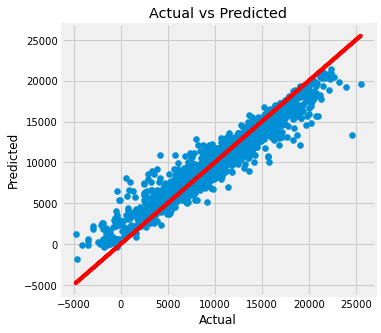

In [34]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()

In [35]:
kag_pred= RF.predict(dftest1_mean_d)

In [36]:
# Prediction values
kag_pred

array([ 8423.53846678,  6221.99200109,  6150.42245123, ...,
       11644.37395113, 11279.83273323, 11771.0067176 ])

In [37]:
# creating a dataframe for our predictions

kag_pred_df= pd.DataFrame(kag_pred, columns=['load_shortfall_3h'])

In [38]:
# Subsetting the 'time' column for submission

kag_hour= dftest['time']

In [39]:
# load shortfall predictions

kag_pred_df.head()

,load_shortfall_3h
0,8423.538467
1,6221.992001
2,6150.422451
3,7392.168278
4,8817.349772


In [40]:
# Concatenating time and prediction 

submit= pd.concat([kag_hour, kag_pred_df], axis=1)

In [41]:
# Examine predictions

submit.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8423.538467
1,2018-01-01 03:00:00,6221.992001
2,2018-01-01 06:00:00,6150.422451
3,2018-01-01 09:00:00,7392.168278
4,2018-01-01 12:00:00,8817.349772


In [43]:
# Check for negative values in the dataframe

submit[(kag_pred_df[kag_pred_df.columns] < 0).any(axis=1)][['load_shortfall_3h']].T

""
load_shortfall_3h


In [44]:
# Get numerical feature importances
importances = list(RF.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(X.columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: timeDay              Importance: 0.195
Variable: timeHour             Importance: 0.1279
Variable: timeElapsed          Importance: 0.0923
Variable: timeDayofyear        Importance: 0.089
Variable: timeDayofweek        Importance: 0.0748
Variable: timeWeek             Importance: 0.0348
Variable: Barcelona_pressure   Importance: 0.0252
Variable: Madrid_wind_speed    Importance: 0.0235
Variable: Bilbao_pressure      Importance: 0.0219
Variable: Valencia_humidity    Importance: 0.0176
Variable: Valencia_wind_speed  Importance: 0.0151
Variable: timeYear             Importance: 0.0139
Variable: timeMonth            Importance: 0.0136
Variable: Bilbao_wind_speed    Importance: 0.0127
Variable: Bilbao_wind_deg      Importance: 0.0123
Variable: Barcelona_temp_min   Importance: 0.0116
Variable: Madrid_pressure      Importance: 0.011
Variable: Valencia_wind_deg    Importance: 0.0105
Variable: Barcelona_wind_deg   Importance: 0.0104
Variable: Madrid_humidity      Importance: 0.0098
Var

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Our variable importance feature selection is taken from our Tuned Random Forest model. We calculated predictor feature importance which tells us how different predictor variables affects the model's performance. We use the ratio / percentage to quantify the importance of each predictor variable. We then sort our predictors highlighting the most important features at the top and the less important features at the bottom. This way, more important variables will have higher percentage increases in the MSE.

In [45]:
# Converting submission to a csv file
submit.to_csv('submit_kaggle.csv', index=False)

## Explaining the Ridge, LinearRegression and Lasso models

### Ridge Regression (L2 Norm)
Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. It helps in reducing the variance of the estimates.

### Multiple linear regression model     
The term linear model implies that the model is specified as a linear combination of features. Based on training data, the learning process computes one weight for each feature to form a model that can predict or estimate the target value.

### Lasso Regression (L1 Norm)

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

The lasso regression allows you to shrink or regularize these coefficients to avoid overfitting and make them work better on different datasets. This type of regression is used when the dataset shows high multicollinearity or when you want to automate variable elimination and feature selection.

In [46]:
# Instantiating Ridge, LinearRegression, Lasso and Random Forest objects

ridge = Ridge()
lm = LinearRegression()
lasso = Lasso()
RF= RandomForestRegressor(n_jobs=-1, 
                          max_depth=30,
                          n_estimators=300,
                          max_features=40,
                          min_samples_leaf=5,
                          random_state=130
                         )

# With the objects created, we will then need to fit the models to our data. This is done using the .fit() function

ridge.fit(X, y)
lm.fit(X, y)
lasso.fit(X, y)
RF.fit(X, y)

# After fitting the models to the data, we generate values of y from x from train dataset, 
# using the different models

train_ridge_pred = ridge.predict(X_train)
train_lm_pred = lm.predict(X_train)
train_cv_pred = cross_val_predict(lm, X_train, y_train, cv=10)
train_lasso_pred = lasso.predict(X_train)
train_RF_pred= RF.predict(X_train)

# After fitting the models to the data, we generate values of y from x fro them test dataset, 
# using the different models

ridge_pred = ridge.predict(X_test)
lm_pred = lm.predict(X_test)
cv_pred = cross_val_predict(lm, X_test, y_test, cv=10)
lasso_pred = lasso.predict(X_test)
RF_pred= RF.predict(X_test)

Ridge()

LinearRegression()

Lasso()

RandomForestRegressor(max_depth=30, max_features=40, min_samples_leaf=5,
                      n_estimators=300, n_jobs=-1, random_state=130)

In [48]:
# Check the the length of predicted values are the same

len(ridge_pred) == len(lm_pred) == len(cv_pred) == len(lasso_pred) == len(RF_pred)

True

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [51]:
# Compare model performance to determine the best model

from sklearn import metrics

results_dict = {'Training RMSE':
                    {
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_train, train_ridge_pred)),
                        "Least Squares": np.sqrt(metrics.mean_squared_error(y_train, train_lm_pred)),
                        "Cross Validation": np.sqrt(metrics.mean_squared_error(y_train, train_cv_pred)),
                        "LASSO": np.sqrt(metrics.mean_squared_error(y_train, train_lasso_pred)),
                        "RF": np.sqrt(metrics.mean_squared_error(y_train, train_RF_pred))
                    },
                    'Test RMSE':
                    {
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)),
                        "Least Squares": np.sqrt(metrics.mean_squared_error(y_test, lm_pred)),
                        "Cross Validation": np.sqrt(metrics.mean_squared_error(y_test, cv_pred)),
                        "LASSO": np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)),
                        "RF": np.sqrt(metrics.mean_squared_error(y_test, RF_pred))
                    },
                    'RSS':
                    {
                        "Ridge": metrics.mean_squared_error(y_test, ridge_pred)*len(X_test),
                        "Least Squares": metrics.mean_squared_error(y_test, lm_pred)*len(X_test),
                        "Cross Validation": metrics.mean_squared_error(y_test, cv_pred)*len(X_test),
                        "LASSO": metrics.mean_squared_error(y_test, lasso_pred)*len(X_test),
                        "RF": metrics.mean_squared_error(y_test, RF_pred)*len(X_test)
                    },
                    'R_squared':
                    {
                        "Ridge": metrics.r2_score(y_test, ridge_pred),
                        "Least Squares": metrics.r2_score(y_test, lm_pred),
                        "Cross Validation": metrics.r2_score(y_test, cv_pred),
                        "LASSO": metrics.r2_score(y_test, lasso_pred),
                        "RF": metrics.r2_score(y_test, RF_pred)
                    },
                }

In [52]:
# Create dataframe from dictionary

results_df = pd.DataFrame(data=results_dict)
results_df

,Training RMSE,Test RMSE,RSS,R_squared
Ridge,4673.138851,4623.887438,3.747973e+10,0.183773
Least Squares,4601.780323,4543.497784,3.618783e+10,0.211908
Cross Validation,4635.990938,713976.025050,8.936124e+14,-19459.935267
LASSO,4679.938568,4625.144964,3.750012e+10,0.183329
RF,1584.837172,1594.365369,4.456128e+09,0.902955


In [53]:
# Save in submission format

results_df.to_csv("models.csv")

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

## Explanation of Performance Indicators

* Coefficient of determination (R^2) measures the amount of variance in the predictions explained by the dataset. 
* It is the difference between the samples in the dataset and the predictions made by the model.
* It measures from zero(0) to one(1) with one representing a perfect model and zero showing that the model will perform badly on unseen data.
* RMSE is the square root of the mean square error (MSE) which represents the average of the squared difference between the true and predicted values. 
* MSE measures the variance of the residuals, while the RMSE measures the standard deviation of the residuals.
* The smaller the RMSE of the model the better.
* The Residual Sum of Squares (RSS) helps us understand how well our model fits the dataset
* The lower the RSS value the better a model fits the dataset

## Discuss chosen methods logic
* Random forests addresses the problem of overfitting.
* They use ensemble learning methods for regression by constructing several Decision trees during training and outputs the average mean of the classes as the prediction of all the trees.
* From our comparism to other models, Random Forest gives us the highest R^2, least RMSE and the lowest RSS, making it the most preffered model.

## Conclusion

* As aspiring data scientists we have developed a model that will assist in predicting the 3 hourly load shortfall of power generated by renewable sources in Spain .
* This will assist in informing the Spanish Government of any trends and patterns of the country's renewable resources and fossil fuel energy generation and whether it is viable to expand its' renewable energy resource infrastructure investments